In [1]:
import numpy as np
import pandas as pd
import sympy
from operator import mul
from functools import reduce
from mpmath import fac
import functools
from sympy import init_printing
from IPython.display import display_latex
init_printing()

# Poisson bracket
$$:f: = \left[f, \cdot \right]
= \frac{\partial f}{\partial x} \frac{\partial \cdot }{\partial p} - \frac{\partial f}{\partial p} \frac{\partial \cdot}{\partial x} $$

In [ ]:
class explieoperator:
    def __init__(self,ham, indep_coords, indep_mom)

In [161]:
class LieBracket:
    """
    Lie bracket class
    """
    def __init__(self, ham, indep_coords, indep_mom):
        self._ham = ham
        if not isinstance(indep_coords, list):
            indep_coords = [indep_coords]
        if not isinstance(indep_mom, list):
            indep_mom = [indep_mom]

        assert(len(indep_coords)==len(indep_mom))
        self._indep_coords = indep_coords
        self._indep_mom = indep_mom
        
    @property
    def ham(self):
        return self._ham
    
    @ham.setter
    def ham(self, other):
        self._ham = self._ham.subs(self.ham, other).doit()
        
    @property
    def indep_coords(self):
        return self._indep_coords
    
    @indep_coords.setter
    def indep_coords(self, other):
        self._indep_coords = other
        
    @property
    def indep_mom(self):
        return self._indep_mom
    
    @indep_mom.setter
    def indep_mom(self, other):
        self._indep_mom = other
        
    def ApplyPoissonBracket(self, other):
        summ = 0
        for i in range(len(self.indep_coords)):
            summ += self.ham.diff(self.indep_coords[i]) * other.diff(self.indep_mom[i]) 
            summ -= self.ham.diff(self.indep_mom[i]) * other.diff(self.indep_coords[i])

        return summ
    
    def PowApplyPoissonBracket(self, other, power):
        summ = 0
        if power == 0:
            summ += other
        else:
            summ += self.ApplyPoissonBracket(self.PowApplyPoissonBracket(other, power - 1))
            
        return summ
    
    def p(self,n):
        F = sympy.Matrix(np.zeros((n+1,n+1)))
        for i in range(n+1):
            for j in range(n+1):
                if (j-i)>=0:
        #             F[i,j] = 1/(np.math.factorial(j-i))
                    F[i,j] = sympy.Rational(1,int(fac(j-i))) # keep it rational !!!!



        G = sympy.Matrix(np.zeros((n+1,n+1)))
        for i in range(n+1):
            for j in range(n+1):
                if (j-i)>=0:
                    if i==j:
                        sigprod = 1
                    else:
                        l = sympy.symbols('s{}:{}'.format(i,j))
                        sigprod = reduce(sympy.Mul,l)
                    G[i,j] = sympy.Mul(sympy.Rational(1,int(np.math.factorial(j-i))),sigprod, evaluate=False)



        qthpower = sympy.Matrix(np.eye(n+1))

        FGm1 = sympy.nsimplify(F*G - qthpower)

        FGm1


        summ = []

        for q in range(1,n+1):
            qthpower = sympy.nsimplify(sympy.MatMul(qthpower, FGm1, evaluate=False))

            summ.append(sympy.nsimplify((-1)**(q-1)/q * qthpower)[0,n]) # q-1 because mathematica starts at 1 and not 0, there for sign change

        return sympy.expand(reduce(functools.partial(sympy.Add,evaluate=False),summ))

    def translated(self,n,ham1_symbol,ham2_symbol):
        l = sympy.symbols('s{}:{}'.format(0,n))
        temp = reduce(functools.partial(sympy.Mul,evaluate=False),[k*k for k in l])
        temp = sympy.expand(sympy.Mul(temp,  self.p(n), evaluate=False),evaluate=False)
        with sympy.evaluate(False):
            ln = sympy.symbols('r{}:{}'.format(0,n), commutative=False)
            for i, s in enumerate(l):
                temp = temp.subs(l[i],ln[i])
            for i in range(n):
                g = sympy.Symbol('g',commutative=False)
                f = sympy.Symbol('f',commutative=False)
                temp = temp.subs(ln[i]**3,g)
                temp = temp.subs(ln[i]**2,f)
        
        temp = temp.subs(f,ham1_symbol)
        temp = temp.subs(g,ham2_symbol)

        return temp
    
    def SumTranslated(self,n,ham1_symbol,ham2_symbol):
#         summ = sympy.expr()
#         for i in range(1,n+1):
#             summ = sympy.Add(summ,self.translated(i,ham1_symbol,ham2_symbol))
            
        return reduce(functools.partial(sympy.Mul,evaluate=False),[self.translated(i,ham1_symbol,ham2_symbol) for i in range(1,n+1)])


In [220]:
x.args

In [162]:
x,p = sympy.symbols('x p')
H = sympy.Function('H', commutative=False)(x,p)
H2 = sympy.Function('H2', commutative=False)(x,p)
g = sympy.Function('g', commutative=False)(x,p)
la = LieBracket(H,x,p)

In [163]:
la.ham, la.indep_coords, la.indep_mom

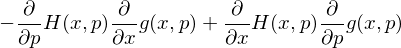

In [164]:
la.ApplyPoissonBracket(g)

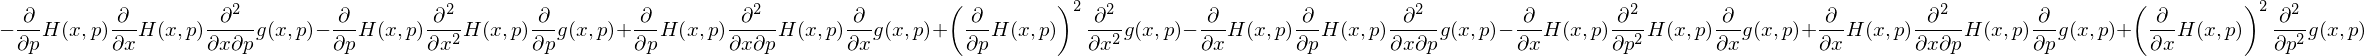

In [222]:
la.PowApplyPoissonBracket(g,2).expand()

In [175]:
la.p(1)

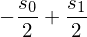

In [176]:
la.p(2)

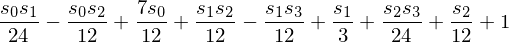

In [166]:
la.p(1)+la.p(2)+la.p(3)+la.p(4)

In [167]:
la.translated(1,H,H2)

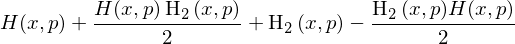

In [168]:
la.translated(1,H,H2)+la.translated(2,H,H2)

In [169]:
la.SumTranslated(1,H,H2)

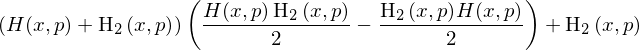

In [174]:
la.SumTranslated(1,la.SumTranslated(2,H,H2),H2)

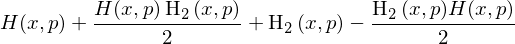

In [35]:
la.SumTranslated(2,H,H2)

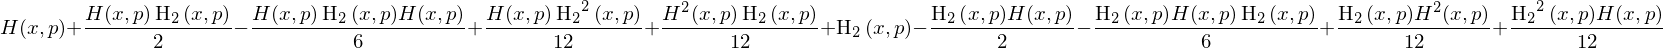

In [36]:
la.SumTranslated(3,H,H2)

In [105]:

def operatorpow(n,op,g,x,p):
    return PoissonOperator()

In [106]:
esp

AttributeError: 'Mul' object has no attribute 'exp'

In [9]:
la.ham = x

In [10]:
la.ApplyPoissonBracket(g).subs(g,p**3+x).doit()

In [187]:
from sympy.physics.quantum.operator import HermitianOperator, Operator

In [188]:
A = Operator('A')
B = Operator('B')

In [216]:
u = sympy.Symbol('u')
fu = sympy.Function('fu')
expr = sympy.exp(u).series(u,n=3)
expr.subs(u,fu(x))
# expr.subs(u,la.SumTranslated(2,H,H2))

TypeError: zip argument #2 must support iteration

In [178]:
a = sympy.Function('a', commutative=False)
b = sympy.Function('b', commutative=False)

In [186]:
sympy.exp(a(x)).series(a(x),n=1)

PolynomialError: non-commutative expressions are not supported

In [181]:
sympy.exp(a(x)+b(x)).series(x=x)

KeyboardInterrupt: 

In [11]:
from sympy import *
var('z')
a = Function('a', commutative=False)
b = Function('b', commutative=False)
a(z)*b(z)-b(z)*a(z)


In [37]:
sympy.__version__

'1.2'

In [63]:
class PoissonOperator(Function):
    @classmethod
    def eval(cls, f,g,x,p):
        if a == 0:
            return Integer(0)
        else:
            summ = 0
            for i in range(len(x)):
                summ += f.diff(x[i]) * g.diff(p[i]) 
                summ -= f.diff(p[i]) * g.diff(x[i])

            return summ
            

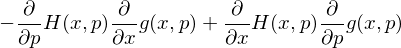

In [177]:
PoissonOperator(H,g,[x],[p])

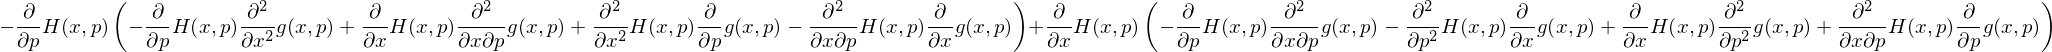

In [74]:
PoissonOperator(H,PoissonOperator(H,g,[x],[p]),[x],[p])

In [101]:
for i in H.args:
    print(i)

x
p


In [102]:
H.func

H

In [ ]:
class PoissonOperator():
    def __new__(cls, arg):
        coords = arg.args[:len(arg.args)/2]
        momenta = arg.args[len(arg.args)/2:]
#         if hasattr(arg, 'coordinates'):
#             c = arg.coordinates
#         elif hasattr(arg, 'conjugate') and hasattr(arg, 'transpose'):
#             p = arg.conjugate().transpose()
        if coords is not None:
            summ = 0
            for i in range(len(coords)):
                summ += arg.func.diff(coords[i]) * g.diff(p[i]) 
                summ -= arg.func.diff(p[i]) * g.diff(x[i])
            return summ
        return Expr.__new__(cls, arg)

In [98]:
class Operator(Function):
    @classmethod
    def eval(cls, f,x):
        if a == 0:
            return Integer(0)
        else:
            summ = 0
            for i in range(len(x)):
                summ += f.diff(x[i]) * g.diff(p[i]) 
                summ -= f.diff(p[i]) * g.diff(x[i])

            return summ

In [99]:
Operator(H,[x])

TypeError: 'Symbol' object does not support indexing

# Baker-Campbell-Hausdorff

$$F_{ij}= \frac{1}{(j-i)!} = \exp\left(\delta_{i+1,j}\right)$$

$$G_{ij}= \frac{1}{(j-i)!}\prod_{k=i}^{j-1}\sigma_k = \exp\left(\delta_{i+1,j} \sigma_i\right)$$

In [9]:
n = 4
def p(n):
    F = sympy.Matrix(np.zeros((n+1,n+1)))
    for i in range(n+1):
        for j in range(n+1):
            if (j-i)>=0:
    #             F[i,j] = 1/(np.math.factorial(j-i))
                F[i,j] = sympy.Rational(1,int(fac(j-i))) # keep it rational !!!!


    
    G = sympy.Matrix(np.zeros((n+1,n+1)))
    for i in range(n+1):
        for j in range(n+1):
            if (j-i)>=0:
                if i==j:
                    sigprod = 1
                else:
                    l = sympy.symbols('s{}:{}'.format(i,j))
                    sigprod = reduce(sympy.Mul,l)
                G[i,j] = sympy.Mul(sympy.Rational(1,int(np.math.factorial(j-i))),sigprod, evaluate=False)



    qthpower = sympy.Matrix(np.eye(n+1))

    FGm1 = sympy.nsimplify(F*G - qthpower)

    FGm1


    summ = 0

    for q in range(1,n+1):
        qthpower = sympy.nsimplify(sympy.MatMul(qthpower, FGm1, evaluate=False))

        summ += sympy.nsimplify((-1)**(q-1)/q * qthpower)[0,n] # q-1 because mathematica starts at 1 and not 0, there for sign change

    return sympy.expand(summ)

def translated(n):
    l = sympy.symbols('s{}:{}'.format(0,n))
    temp = reduce(functools.partial(sympy.Mul,evaluate=False),[k*k for k in l])
    temp = sympy.expand(sympy.Mul(temp, p(n), evaluate=False),evaluate=False)
    with sympy.evaluate(False):
        ln = sympy.symbols('r{}:{}'.format(0,n), commutative=False)
        for i, s in enumerate(l):
            temp = temp.subs(l[i],ln[i])
        for i in range(n):
            g = sympy.Symbol('g',commutative=False)
            f = sympy.Symbol('f',commutative=False)
            temp = temp.subs(ln[i]**3,g)
            temp = temp.subs(ln[i]**2,f)
    
    return temp
   

print(translated(1))
print(translated(2))
print(translated(3))
print(translated(4))

f + g
f*g/2 - g*f/2
f*f*g/12 - f*g*f/6 + f*g*g/12 + g*f*f/12 - g*f*g/6 + g*g*f/12
f*f*g*g/24 - f*g*f*g/12 + g*f*g*f/12 - g*g*f*f/24


In [10]:
translated(1)

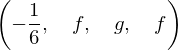

In [4]:
translated(3).args[0].args

In [5]:
for a in sympy.preorder_traversal(translated(3)):
    print(a)

f*f*g/12 - f*g*f/6 + f*g*g/12 + g*f*f/12 - g*f*g/6 + g*g*f/12
-f*g*f/6
-1/6
f
g
f
-g*f*g/6
-1/6
g
f
g
f*f*g/12
1/12
f
f
g
f*g*g/12
1/12
f
g
g
g*f*f/12
1/12
g
f
f
g*g*f/12
1/12
g
g
f


In [12]:
translated(4).subs(f,x)

NameError: name 'f' is not defined

In [10]:
translated(4).args[0].args[1:-1]

In [10]:
la = translated(3)

In [13]:
la.as_ordered_factors()

[-f*f*g/6 - f*g*g/6 + f*f*g/12 + f*g*g/12 + f*f*g/12 + f*g*g/12]

In [8]:
print(reduce(sympy.Mul,sympy.symbols('a{}:{}'.format(0,3))))

a0*a1*a2


In [30]:
p = sympy.symbols('p')

In [35]:
PoissionBracket(x,x,x,p)

0

In [ ]:
# symbols for drift
delta, px, py, L = sympy.symbols('delta px py, L')

# drift Lie operator
f_drift = - L * sympy.sqrt((1+delta**2 - px**2 - py**2))
exp_f_drift = sympy.exp(f_drift)

def exp_f_drift_order(n):
    return exp_f_drift.expand()



# Algebra classes

In [7]:
class LieAlgElem:
    
    def __init__(self,expr):
        self.expr = expr
        
    @staticmethod
    def LieBracket(f,g,x,p):
        if not isinstance(x, list):
            x = [x]
        if not isinstance(p, list):
            p = [p]

        assert(len(x)==len(p))

        summ = 0
        for i in range(len(x)):
            summ +=  f.diff(x[i]) * g.diff(p[i]) - f.diff(p[i]) * g.diff(x[i])

        return summ
    
    def __add__(self, other):
        return sympy.Add(self,other, evaluate=False)
    
    def __mul__(self, other, order_bracket, order_expansion):
        pass
        
        

In [13]:
x = sympy.Symbol('x')
f = sympy.Function('f')(x)
f.diff(x).subs({f:x}).doit()

In [14]:
x,p = sympy.symbols('x p')
f = sympy.Function('f')(x,p)
g = sympy.Function('g')(x,p)

In [15]:
f.diff(x).subs({f:x**2}).doit()

In [116]:
x.diff(p)

0

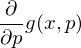

In [17]:
sympy.simplify(LieBracket(f,g,x,p).subs(f,x).doit())

# Test

## Drift

In [9]:
H_drift.diff(delta)

-delta/sqrt(delta**2 - px**2 - py**2 + 1)

In [15]:
x,y = sympy.symbols('x y')

PoissionBracket(f_drift,x,[x,y],[px,py])

-L*px/sqrt(delta**2 - px**2 - py**2 + 1)

In [18]:
exp_f_drift_order(0)

exp(-L*sqrt(delta**2 - px**2 - py**2 + 1))

In [22]:
sympy.series(f_drift.subs(delta,0),px,n=1)

-15*L/(16*sqrt(-py**2 + 1)) + 5*L*sqrt(-py**2 + 1)/(16*(py**4 - 2*py**2 + 1)) - L*sqrt(-py**2 + 1)/(16*(-py**6 + 3*py**4 - 3*py**2 + 1)) - 5*L*sqrt(-py**2 + 1)/16 + 15*L*py**2/(16*sqrt(-py**2 + 1)) - 5*L*py**2*sqrt(-py**2 + 1)/(8*(py**4 - 2*py**2 + 1)) + 3*L*py**2*sqrt(-py**2 + 1)/(16*(-py**6 + 3*py**4 - 3*py**2 + 1)) + 5*L*py**4*sqrt(-py**2 + 1)/(16*(py**4 - 2*py**2 + 1)) - 3*L*py**4*sqrt(-py**2 + 1)/(16*(-py**6 + 3*py**4 - 3*py**2 + 1)) + L*py**6*sqrt(-py**2 + 1)/(16*(-py**6 + 3*py**4 - 3*py**2 + 1)) + O(px)

In [27]:
PoissionBracket(sympy.series(-L*sympy.sqrt(1+px**2),px,n=3), x,[x,y],[px,py])

L*px + O(px**2)

In [216]:
def gen(q0,p0,dt =1e-3,steps=100,K=.5):
    itsteps = iter(steps)
    Q=[q0]
    P=[p0]
    while True:
        try:
            q1 = (q0 + K* np.sin(p0)) % (2 * np.pi)
            p1 = (p0 + q1)% (2 * np.pi)
            Q.append(q1)
            P.append(p1)
            q0 = q1
            p0 = p1
        except StopIteration:
            break
    return list(zip(Q,P))
    

In [217]:
qs = np.linspace(0,2*np.pi,10)
ps = np.linspace(0,2*np.pi,10)

grid = np.meshgrid(qs,ps)
coords= 

[array([[0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
         3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531],
        [0.        , 0.6981